# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# The Limitations Of Elbow Curve And What You Should Replace It With

Post Link: [Substack](https://www.blog.dailydoseofds.com/p/the-limitations-of-elbow-curve-and)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:share:7075402395458912256)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1669636678867116033)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gittar/breathing-k-means/master/data/gmd5x5.csv", names = ["X1", "X2"])
df

,X1,X2
0,0.111664,0.090023
1,0.085615,0.106970
2,0.114612,0.020423
3,0.075775,0.136066
4,0.093122,0.152457
...,...,...
9995,0.901810,0.953877
9996,0.893658,0.920629
9997,0.935340,0.891243
9998,0.912754,0.878020


In [6]:
X = df.values

In [7]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

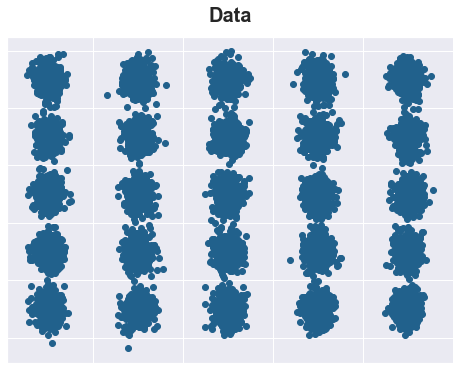

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df.X1, df.X2, c = colors[8])
ax.set_title('Data',  fontsize = 20, fontweight="bold", pad = 15)

ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [9]:
# Initialize empty lists to store the inertia (WCSS) and silhouette coefficient
inertia = []
silhouette_scores = []

# Define the range of cluster numbers to test
cluster_range = range(2, 31)

# Perform clustering and calculate inertia and silhouette coefficient for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

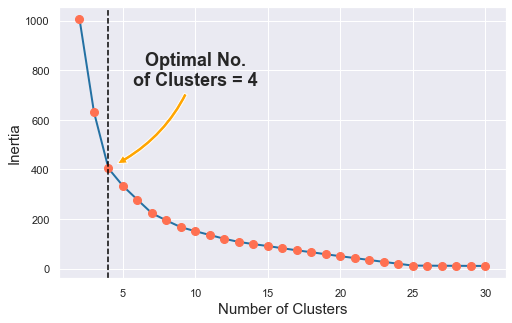

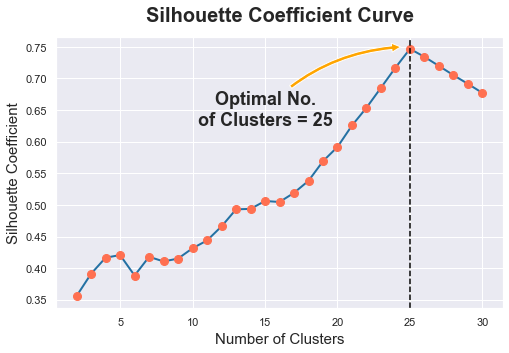

In [10]:
# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', markersize=0, lw=2, c = colors[1])
plt.plot(cluster_range, inertia, marker='o', markersize=8, lw = 0, color=colors[12])
plt.axvline(x=4, linestyle='--', color='black')
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)

plt.annotate("Optimal No.\nof Clusters = 4", (4.5, 420), (10,800), size=18, fontweight = "bold", va="center", ha="center",
            arrowprops=dict(arrowstyle="simple", facecolor='orange',
                            connectionstyle="arc3,rad=-0.2"))

plt.savefig("kmeans_clusters_elbow.jpeg", dpi=600, bbox_inches = "tight")
plt.show()

# Plotting the silhouette coefficient curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', markersize=0, lw=2, c = colors[1])
plt.plot(cluster_range, silhouette_scores, marker='o', markersize=8, lw = 0, color=colors[12])
plt.axvline(x=25, linestyle='--', color='black')
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)
plt.title('Silhouette Coefficient Curve', fontsize = 20, fontweight="bold", pad = 15)

plt.annotate("Optimal No.\nof Clusters = 25", (24.5, 0.75), (15,0.65), size=18, fontweight = "bold", va="center", ha="center",
            arrowprops=dict(arrowstyle="simple", facecolor='orange',
                            connectionstyle="arc3,rad=-0.2"))


plt.show()